# Suicide Visualization

In [26]:
import pandas as pd
import numpy as np

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (6,6)

In [7]:
suicides = pd.read_csv("data/suicides.2.clean.csv")

In [8]:
suicides.head(10)

,country,year,sex,age_group,suicides,population,suicide_rate,gdp_per_capita,generation,unique_model
0,Albania,1987,male,15-24 years,21,312900,6.71,796,Generation X,Albania-male-15-24 years-1987
1,Albania,1987,male,35-54 years,16,308000,5.19,796,Silent,Albania-male-35-54 years-1987
2,Albania,1987,female,15-24 years,14,289700,4.83,796,Generation X,Albania-female-15-24 years-1987
3,Albania,1987,male,75+ years,1,21800,4.59,796,G.I. Generation,Albania-male-75+ years-1987
4,Albania,1987,male,25-34 years,9,274300,3.28,796,Boomers,Albania-male-25-34 years-1987
5,Albania,1987,female,75+ years,1,35600,2.81,796,G.I. Generation,Albania-female-75+ years-1987
6,Albania,1987,female,35-54 years,6,278800,2.15,796,Silent,Albania-female-35-54 years-1987
7,Albania,1987,female,25-34 years,4,257200,1.56,796,Boomers,Albania-female-25-34 years-1987
8,Albania,1987,male,55-74 years,1,137500,0.73,796,G.I. Generation,Albania-male-55-74 years-1987
9,Albania,1987,female,5-14 years,0,311000,0.00,796,Generation X,Albania-female-5-14 years-1987


In [9]:
suicides = suicides.drop([suicides.columns[9]], axis ='columns')

In [10]:
suicides.head()

,country,year,sex,age_group,suicides,population,suicide_rate,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,796,Boomers


## Distribution

In [11]:
import seaborn as sns
from ipywidgets import interact, fixed

In [12]:
def numerical_variable_distribution(df, col):
    df[col].plot.kde()
    plt.xlabel('Variable "{}" Distribution'.format(col))
    plt.show()

In [13]:
numerical_columns = suicides.select_dtypes(include=[np.number]).columns.tolist()

In [14]:
interact(numerical_variable_distribution, 
         col=numerical_columns, df=fixed(suicides));

interactive(children=(Dropdown(description='col', options=('year', 'suicides', 'population', 'suicide_rate', '…

## Correlations

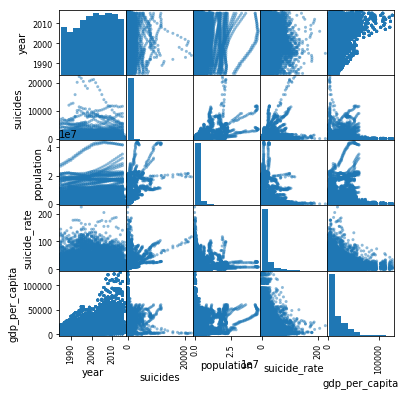

In [15]:
pd.plotting.scatter_matrix(suicides.select_dtypes(include=[np.number]));

In [16]:
suicides.corr()

,year,suicides,population,suicide_rate,gdp_per_capita
year,1.000000,-0.004546,0.008850,-0.039037,0.339134
suicides,-0.004546,1.000000,0.616162,0.306604,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.081510
suicide_rate,-0.039037,0.306604,0.008285,1.000000,0.001785
gdp_per_capita,0.339134,0.061330,0.081510,0.001785,1.000000


##### Correlations I see and will investigate are with year and gdp per capita, and population and suicides.

## Comparing GDP per capita to the Dow Jones Industrial Average since 1985

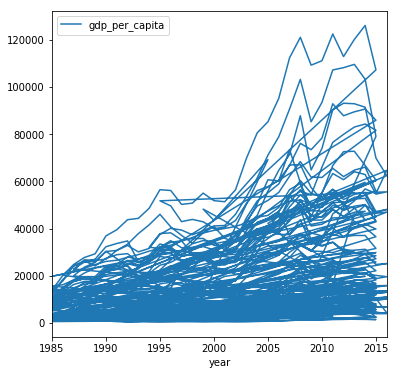

In [17]:
suicides.plot.line(x="year", y="gdp_per_capita");

<img src="dowj2.png" alt="Smiley face" height="600" width="600">

##### While this is unrelated to the bulk of the data, this tells me I'm working with good information as these two graphs share similar shapes. 

## Investigating the correlation between population and suicides

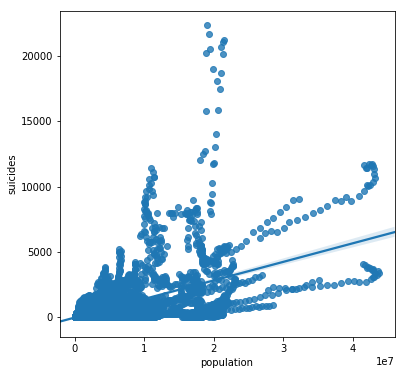

In [23]:
sns.regplot("population", "suicides", data=suicides);

##### We see that there is a moderate correlation between population and number of suicides. This makes sense as an increase in the population, ceterus parabus, would lead to an increase in the amount of suicides.

## Investigating the correlation between GDP per capita and suicide rates

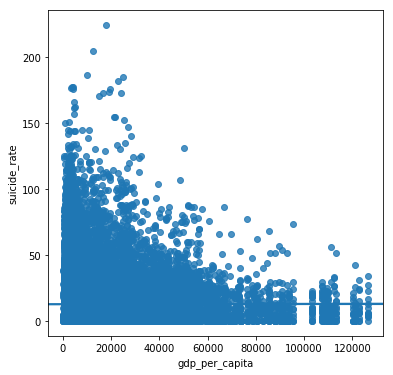

In [24]:
sns.regplot("gdp_per_capita", "suicide_rate", data=suicides);

#### It appeared as there was some kind of shape here but it appears these two are uncorrelated (correlation of. 0.001785)

## Categorical Variable Grouping

In [25]:
def cardinality_categorical(df):
    n_records = len(df)
    for column in df.select_dtypes([object]):
        print("{} | uniques/records: {:.3f} | Minimum observations: {:.3f}".format(
            column, 
            len(df[column].unique())/n_records,
            df[column].value_counts().min()
        ))        

cardinality_categorical(suicides)

country | uniques/records: 0.004 | Minimum observations: 10.000
sex | uniques/records: 0.000 | Minimum observations: 13910.000
age_group | uniques/records: 0.000 | Minimum observations: 4610.000
generation | uniques/records: 0.000 | Minimum observations: 1470.000


In [85]:
len(suicides['country'].unique().tolist())

101

In [158]:
len(suicides['age_group'].unique().tolist())

6

In [87]:
len(suicides['generation'].unique().tolist())

6

##### This makes sense because there is a decent variety of countries but when it comes to sex, age group and generation, there are a very limited number of options. (101 countries, 2 sexes, 6 age groups and generatoins).

## Suicide Rate Increases between 2006 and 2008 (pre and post financial crisis)

In [170]:
US_2008 = suicides[(suicides.year == 2008) & (suicides.country == 'United States')]

In [171]:
US_2008.head()

,country,year,sex,age_group,suicides,population,suicide_rate,gdp_per_capita,generation
27124,United States,2008,male,75+ years,2531,7072366,35.79,52128,Silent
27125,United States,2008,male,35-54 years,11371,43002471,26.44,52128,Boomers
27126,United States,2008,male,55-74 years,6558,25698503,25.52,52128,Silent
27127,United States,2008,male,25-34 years,4273,20007152,21.36,52128,Generation X
27128,United States,2008,male,15-24 years,3560,22184611,16.05,52128,Millenials


In [172]:
US_2006 = suicides[(suicides.year == 2006) & (suicides.country == 'United States')]

In [173]:
US_2006.head()

,country,year,sex,age_group,suicides,population,suicide_rate,gdp_per_capita,generation
27100,United States,2006,male,75+ years,2494,6986609,35.70,49666,Silent
27101,United States,2006,male,35-54 years,10641,43139910,24.67,49666,Boomers
27102,United States,2006,male,55-74 years,5431,23894147,22.73,49666,Silent
27103,United States,2006,male,25-34 years,4053,20564653,19.71,49666,Generation X
27104,United States,2006,male,15-24 years,3528,21844954,16.15,49666,Millenials


In [186]:
US_2008['suicide_growth'] = abs(1-(US_2008.reset_index().suicide_rate / US_2006.reset_index().suicide_rate).values)

/Users/henryfernandez/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [273]:
US_2008.head()

,country,year,sex,age_group,suicides,population,suicide_rate,gdp_per_capita,generation,suicide_growth
27124,United States,2008,male,75+ years,2531,7072366,35.79,52128,Silent,0.002521
27125,United States,2008,male,35-54 years,11371,43002471,26.44,52128,Boomers,0.071747
27126,United States,2008,male,55-74 years,6558,25698503,25.52,52128,Silent,0.122745
27127,United States,2008,male,25-34 years,4273,20007152,21.36,52128,Generation X,0.083714
27128,United States,2008,male,15-24 years,3560,22184611,16.05,52128,Millenials,0.006192


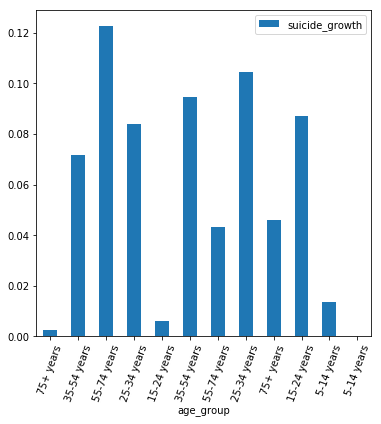

In [190]:
US_2008.plot.bar(x='age_group', y='suicide_growth', rot=70)

###### We can see from this bar graph that suicides increased the most (12%) in men between 55 and 74 years old and women between 25-34 years old. (10.4%)

## World Suicide Rates

In [218]:
world_suicide = suicides.drop(["age_group", "suicide_rate", "gdp_per_capita", "generation"], axis =1)

In [239]:
world_suicide.groupby('country').sum()[['suicides']].head()

,suicides
country,
Albania,1970
Antigua and Barbuda,11
Argentina,82219
Armenia,1905
Aruba,101


In [237]:
df = world_suicide.groupby('country').sum()[['population']].merge(world_suicide.groupby(
    'country').sum()[['suicides']], left_on="country", right_on="country")

In [248]:
df["suicide_rate"]=df["suicides"]/df["population"]

In [249]:
df.head()

,population,suicides,suicide_rate
country,,,
Albania,62325467,1970,0.000032
Antigua and Barbuda,1990228,11,0.000006
Argentina,1035985431,82219,0.000079
Armenia,77348173,1905,0.000025
Aruba,1259677,101,0.000080


In [256]:
best = df.sort_values(by="suicide_rate")

In [257]:
worst = df.sort_values(ascending=False, by="suicide_rate")

In [270]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (22,7)

### These are the countries with the lowest suicide rates in the data set

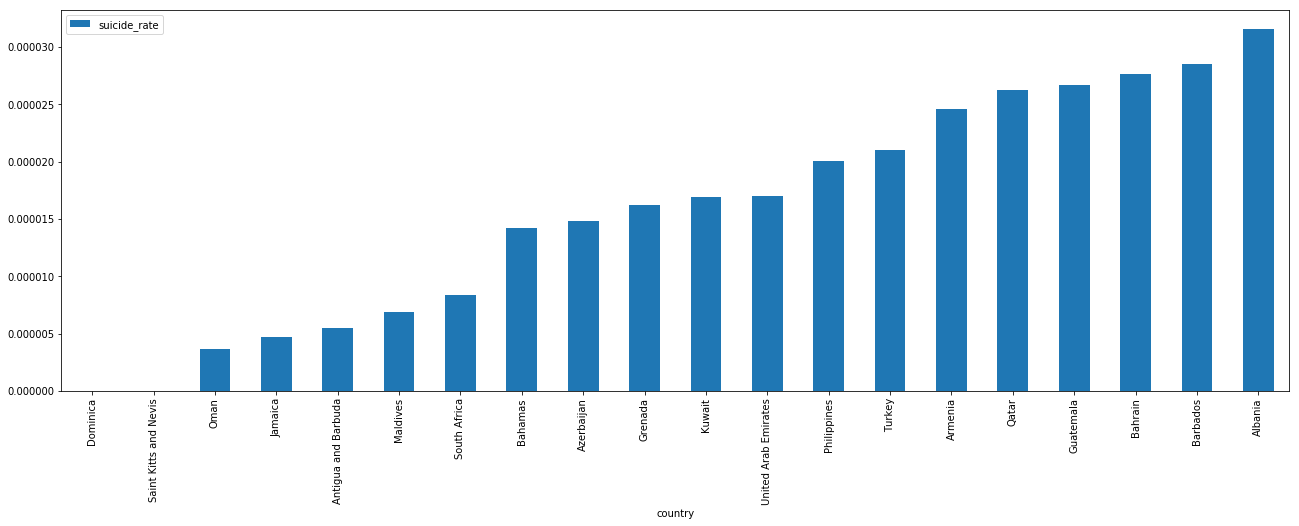

In [271]:
best[:20].reset_index().plot.bar(x='country', y='suicide_rate', rot=90)

### These are the countries with the highest suicide rates in the data set

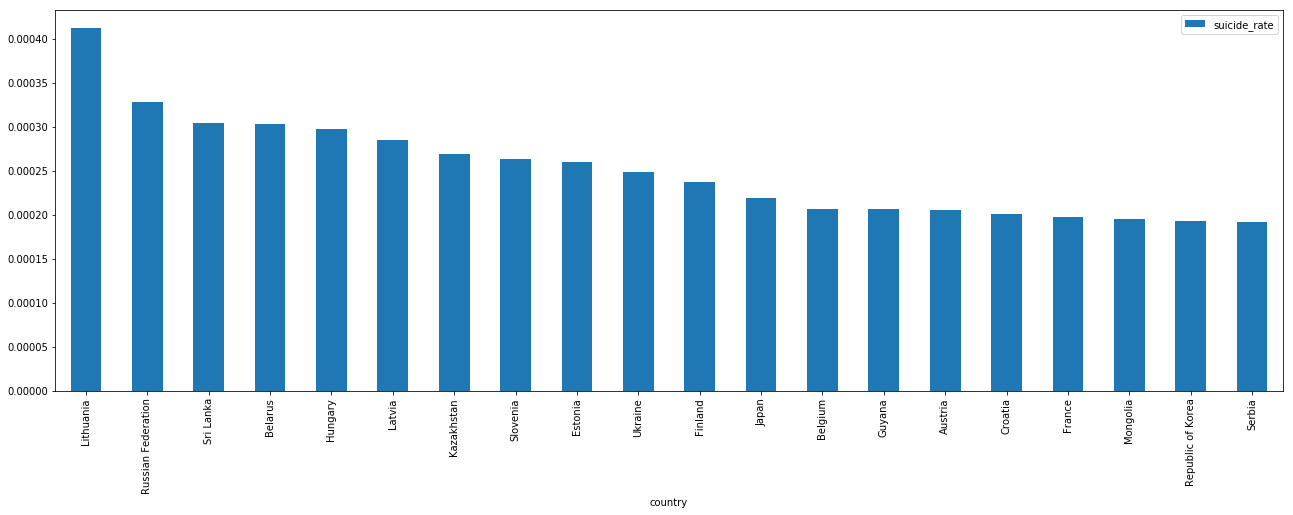

In [269]:
worst[:20].reset_index().plot.bar(x='country', y='suicide_rate', rot=90)

### To understand the scale of these differences, these are the suicide rates of all the countries

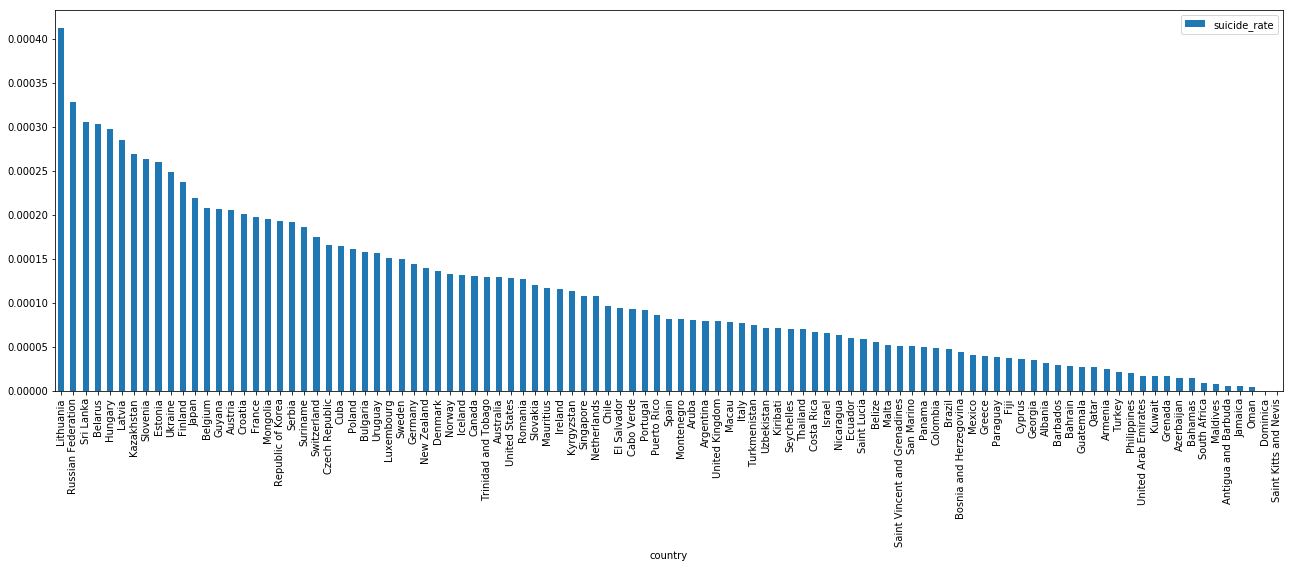

In [272]:
worst.reset_index().plot.bar(x='country', y='suicide_rate', rot=90)

#### Lithuania has the highest at around .0004 and Oman has one of the lowest at .000005

## Comparing global suicide rates between men and women since 2010

In [276]:
men2010 = suicides[(suicides.year > 2010) & (suicides.sex == 'male')]

In [278]:
men2010.shape

(2402, 9)

In [288]:
men2010 = men2010.drop(["age_group", "suicide_rate", "gdp_per_capita", "generation"], axis =1)

In [307]:
men2010.head()

,country,year,sex,suicides,population
546,Antigua and Barbuda,2012,male,0,7893
547,Antigua and Barbuda,2012,male,0,6629
548,Antigua and Barbuda,2012,male,0,13280
549,Antigua and Barbuda,2012,male,0,8475
550,Antigua and Barbuda,2012,male,0,4994


In [308]:
men2010.groupby('country').sum()[['suicides']].head()

,suicides
country,
Antigua and Barbuda,0
Argentina,12360
Armenia,304
Aruba,7
Australia,10160


In [343]:
men = men2010.groupby('country').sum()[['population']].merge(world_suicide.groupby(
    'country').sum()[['suicides']], left_on="country", right_on="country")

In [344]:
men["suicide_rate"]=men["suicides"]/men["population"]

In [368]:
men.head()

,population,suicides,suicide_rate
country,,,
Antigua and Barbuda,172463,11,0.000064
Argentina,94695206,82219,0.000868
Armenia,7670262,1905,0.000248
Aruba,45303,101,0.002229
Australia,53564497,70111,0.001309


In [364]:
women2010 = suicides[(suicides.year > 2010) & (suicides.sex == 'female')]

In [365]:
women2010.shape

(2402, 9)

In [366]:
women2010 = women2010.drop(["age_group", "suicide_rate", "gdp_per_capita", "generation"], axis =1)

In [367]:
women2010.head()

,country,year,sex,suicides,population
540,Antigua and Barbuda,2012,female,0,8435
541,Antigua and Barbuda,2012,female,0,7215
542,Antigua and Barbuda,2012,female,0,15193
543,Antigua and Barbuda,2012,female,0,8401
544,Antigua and Barbuda,2012,female,0,5512


In [369]:
women2010.groupby('country').sum()[['suicides']].head()

,suicides
country,
Antigua and Barbuda,1
Argentina,3091
Armenia,108
Aruba,2
Australia,3338


In [370]:
women = women2010.groupby('country').sum()[['population']].merge(world_suicide.groupby(
    'country').sum()[['suicides']], left_on="country", right_on="country")

In [371]:
women["suicide_rate"]=women["suicides"]/women["population"]

In [372]:
women.head()

,population,suicides,suicide_rate
country,,,
Antigua and Barbuda,188745,11,0.000058
Argentina,99597615,82219,0.000826
Armenia,8623465,1905,0.000221
Aruba,50185,101,0.002013
Australia,54324874,70111,0.001291


# Male Suicide Rates Since 2010

In [373]:
malebad = men.sort_values(ascending=False, by="suicide_rate")

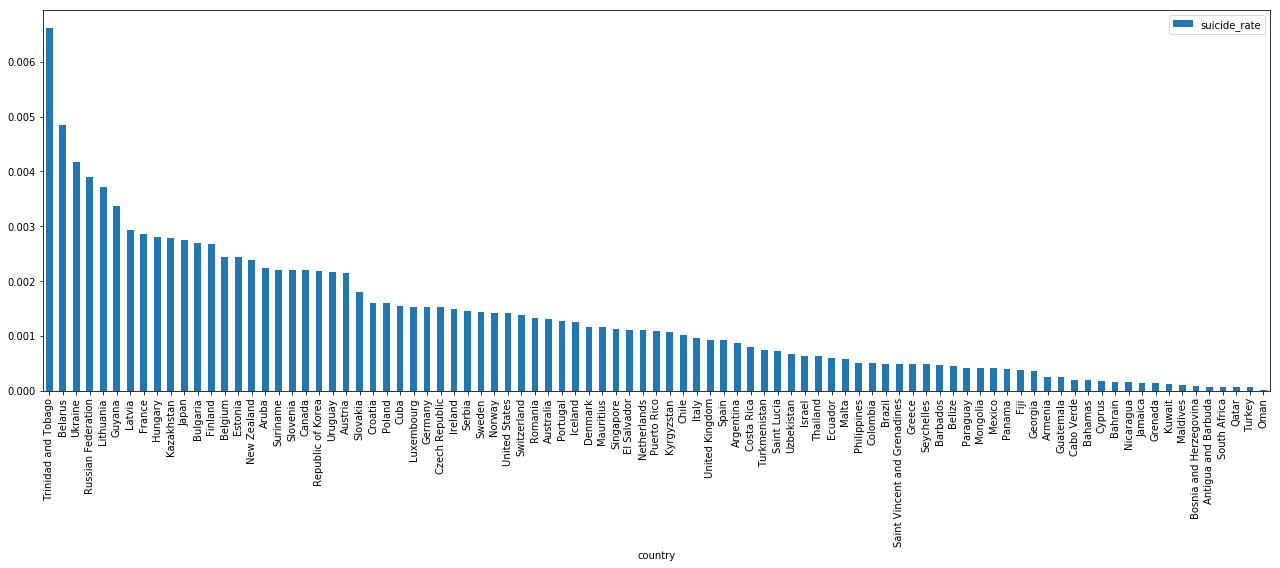

In [374]:
malebad.reset_index().plot.bar(x='country', y='suicide_rate', rot=90)

# Female Suicide Rates Since 2010

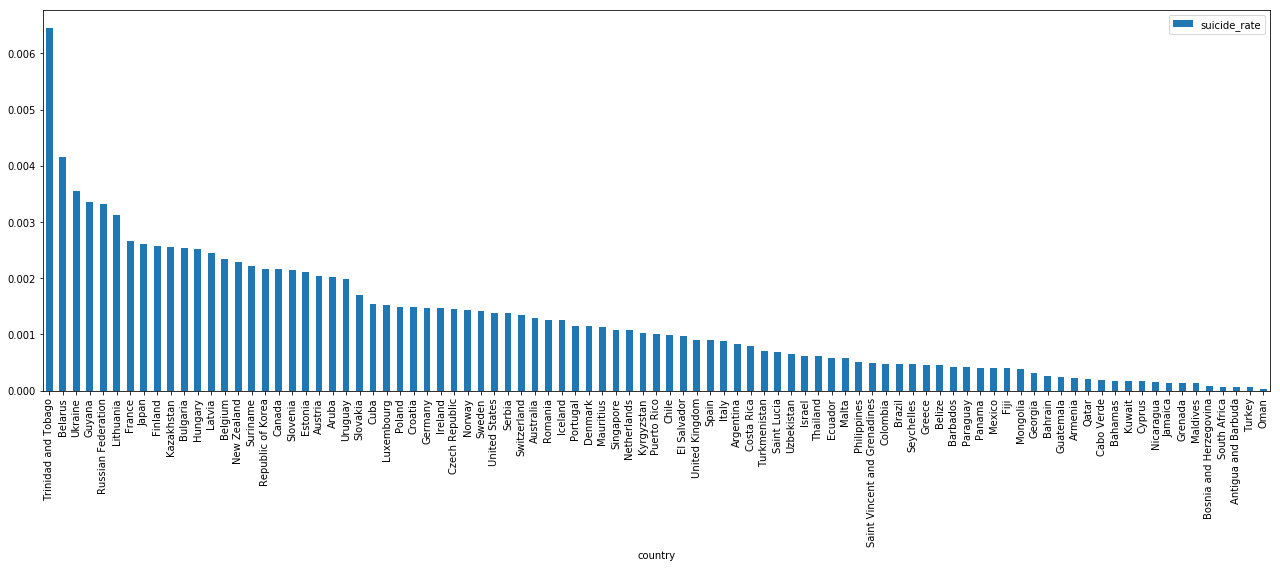

In [375]:
femalebad = women.sort_values(ascending=False, by="suicide_rate")

femalebad.reset_index().plot.bar(x='country', y='suicide_rate', rot=90)

# Analysis Conclusion


#### Description
The dataset contains the country, year, sex, age_group, suicides, population, suicide_rate, gdp_per_capita, HDI for year, country-year, and generation. HDI for year and country-year were removed from this dataset as they were not important to the analysis.

The original dataset is located at: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016


The variables that exist on the dataset are:

* country (object). Country where events took place
* year (int).
* sex (object). Sex of suicide victim
* age (object). Age range of suicide victim
* suicides (int). Number of suicides
* population (int). Country population that year
* suicide rate (float). suicides per 100k population
* gdp per capita (int). Per person GDP for that country that year in US dollars
* generation (object). Which generation the age group is representing

#### QA

There are 0 duplicate rows.
There are 0 missing values.
Nothing noteworthy in the cardinalities - all relatively high. 
There are outliers in the variables suicides, population, suicide_rate and gdp_per_capita

No numerical variable follows a normal distribution

#### Conclusions

The variables population and suicides are moderately correlated (0.616162).
The variables year and gdp_per_capita are also correlated (0.306604).
The data provided for gdp_per_capita follows a similar shape as the DJIA since 1985.
By just looking at it's shape, there appears to be a possible correlation between GDP per capita and suicide rates, but none exists.
After the financial of '07-'08, suicides increased the most (12%) in men between 55 and 74 years old and women between 25-34 years old. (10.4%).
The countries with the highest suicide rates are, in order, Lithuania, Russian Federation, Sri Lanka, Belarus, Hungry, Latvia and Kazakhstan. 
The countries with the lowest suicide rates are, in order, Dominica, St. Kitts and Nevis, Oman, Jamaica, Antigua and Barbuda, Maldives, and South Africa.
When Broken down by sex, Trinidad and Tobago owns the highest suicide rate for both men and women (.0065)